<a href="https://colab.research.google.com/github/marrs-lab/ocean_color/blob/main/mean_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is the mean cosine of a radiance distribution?

The average cosine of the nadir angle of all downward traveling photons; it equals the ratio of the plane irradiance to the scalar irradiance for the downward direction. The average cosines are AOPs. Nondimensional.

In [286]:
import numpy
from numpy import linalg, newaxis, random
from matplotlib import collections
import matplotlib.pyplot as plt

First let's generate 1000 of vectors randomly and uniformly selected going to a central point (0,0)

(-1.1, 1.1, -1.1, 1.2)

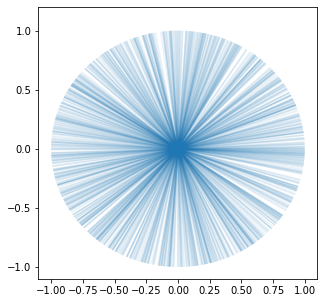

In [287]:
def gen_rand_vecs(dims, number):
    vecs = random.normal(size=(number,dims))
    mags = linalg.norm(vecs, axis=-1)

    return vecs / mags[..., newaxis]

ends = gen_rand_vecs(2, 1000)

# Add 0 vector to start
vectors = numpy.insert(ends[:, newaxis], 0, 0, axis=1)

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))

Let's only look at the downward vectors going to this point as a simulator of downward irradiance (Ed)

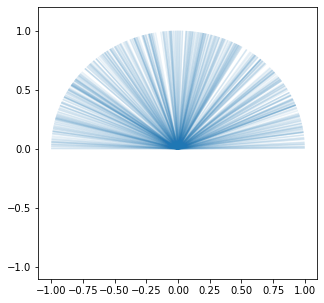

In [288]:
downward_vecs = vectors[vectors[:,1,1]>0]
# sort them so we can grab them with a probability distribution
downward_vecs_sort = downward_vecs[downward_vecs[:, 1,0].argsort()]

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))

plt.show()

In [289]:
print('The mean cosine of this distribution is: ', np.mean(downward_vecs_sort[:,1,1]))

The mean cosine of this distribution is:  0.6394233792175309


Now let's create some probability distributions so that we grab vectors based on some likelihood

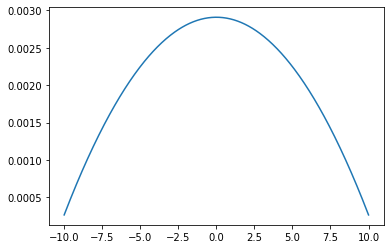

In [294]:
# create len(downward_vecs_sort) equally spaced points between -10 and 10
x = np.linspace(-10, 10, len(downward_vecs_sort))

# calculate the y value for each element of the x vector
y = -x**2/100 +1.1

prob_dist = y/y.sum()

fig, ax = plt.subplots()
ax.plot(x, prob_dist)

Grab 10,000 samples with replacement based on this distribution

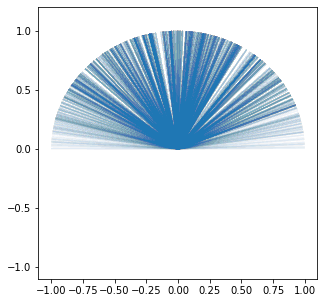

In [295]:
from numpy.random import choice
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))
plt.show()

In [296]:
print('The mean cosine of this distribution is: ', np.mean(downward_vecs_sort[idxs,1,1]))

The mean cosine of this distribution is:  0.7618781974978097


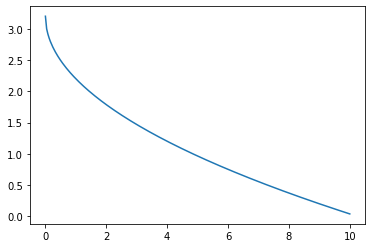

In [297]:
# create len(downward_vecs_sort)/2 equally spaced points between -10 and 10
x = np.linspace(0, 10, int(len(downward_vecs_sort)/2))

# calculate the y value for each element of the x vector
y = -x**(0.5)+3.2

fig, ax = plt.subplots()
ax.plot(x, y)

Flip it and stack it so that we have a strongly peaks distribution

In [299]:
peaked_dist = np.hstack((np.flip(y),y))
peaked_prob_dist = peaked_dist/peaked_dist.sum()

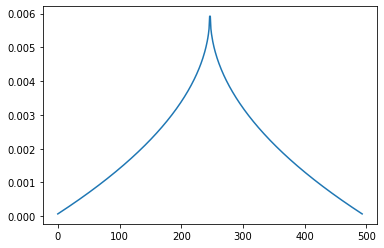

In [300]:
plt.plot(peaked_prob_dist)

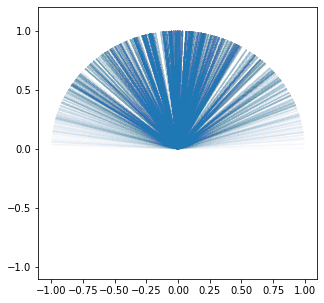

In [303]:
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=peaked_prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))
plt.show()

In [304]:
print('The mean cosine of this distribution is: ', np.mean(downward_vecs_sort[idxs,1,1]))

The mean cosine of this distribution is:  0.8319839166295424


Then some more extreme examples where we just subset the vector set:

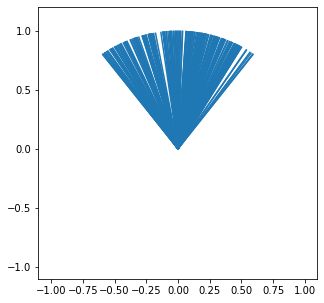

0.9356784664374859

In [305]:
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.8]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

plt.show()
np.mean(vectors[vectors[:,1,1]>.8][:,1,1])

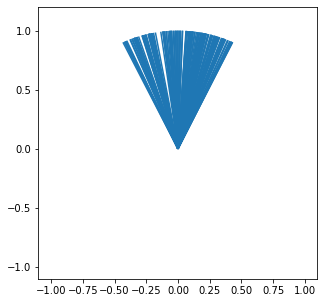

0.9668566051592676

In [306]:

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.9]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

plt.show()
np.mean(vectors[vectors[:,1,1]>.9][:,1,1])